![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [159]:
import warnings
#warnings.filterwarnings('ignore')

In [160]:
# Importación librerías
import pandas as pd
import numpy as np


In [161]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [162]:
# Visualización datos de entrenamiento
dataTraining.head()

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [163]:
# Visualización datos de test
dataTesting.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [164]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
#np.random.seed(42)
#y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [165]:
# Guardar predicciones en formato exigido en la competencia de kaggle
#y_pred.to_csv('test_submission_file.csv', index_label='ID')
#y_pred.head()

### Librerías a importar

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [167]:
# Plots
def plot_histograms(dataframe):
    # Get the column names of the DataFrame
    columns = dataframe.columns
    # Set up the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols // 3) + (num_cols % 3 > 0)
    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, 3, figsize=(16, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3)  # Adjust vertical space between subplots
    # Flatten the 2D array of axes to simplify indexing
    axes = axes.flatten()
    # Loop through each column and plot the histogram
    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(dataframe[column], ax=ax, kde = True)
        ax.set_title(f'Histograma de {column}')
    # Remove empty subplots if needed
    for i in range(num_cols, num_rows * 3):
        fig.delaxes(axes[i])
    plt.show()

def plot_boxplots_vscat(dataframe,target):
    # Get the column names of the DataFrame
    columns = dataframe.select_dtypes(include=['number']).columns
    # Set up the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols // 2) + (num_cols % 2 > 0)  # Change 4 to 3
    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 4 * num_rows), sharey='row')  # Change 4 to 3
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3)  # Adjust vertical space between subplots
    # Flatten the 2D array of axes to simplify indexing
    axes = axes.flatten()

    # Loop through each column and plot the boxplot with hue
    for i, column in enumerate(columns):
        ax = axes[i]
        sns.boxplot(x=dataframe[column], y=target, ax=ax)
        ax.set_title(f'Boxplot of {column}')

    # Remove empty subplots if needed
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])
    plt.show()

### 1. Preprocesamiento de Datos [10 puntos]

In [168]:
dataTraining.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.849,9,...,1,0.0549,0.000058,0.056700,0.4640,0.320,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.190,7,...,0,0.0370,0.930000,0.000356,0.0834,0.133,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.509,1,...,1,0.0362,0.777000,0.202000,0.1150,0.544,90.459,3,idm,37


#### Diccionario de Datos

| Campo              | Descripción                                                                                                                                                                                                                                                                     |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| track_id           | El ID único de la pista en Spotify.                                                                                                                                                                                                                                              |
| artists            | Los nombres de los artistas que interpretaron la pista. Si hay más de un artista, están separados por un punto y coma (;).                                                                                                                                                         |
| album_name         | El nombre del álbum en el que aparece la pista.                                                                                                                                                                                                                                 |
| track_name         | El nombre de la pista.                                                                                                                                                                                                                                                           |
| popularity         | La popularidad de la pista, un valor entre 0 y 100, donde 100 es la más popular. La popularidad se calcula por un algoritmo basado en el número total de reproducciones y la reciente actividad de estas reproducciones.                                                     |
| duration_ms        | La duración de la pista en milisegundos.                                                                                                                                                                                                                                         |
| explicit           | Indica si la pista tiene letras explícitas (true = sí; false = no o desconocido).                                                                                                                                                                                                |
| danceability       | Describe cuán adecuada es la pista para bailar, basada en una combinación de elementos musicales como tempo, estabilidad del ritmo, fuerza del beat y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es totalmente bailable.                                    |
| energy             | Un valor entre 0.0 y 1.0 que representa la intensidad y actividad perceptual de la pista. Las pistas más enérgicas suelen ser rápidas, ruidosas y activas, como el death metal.                                                                                             |
| key                | La tonalidad en la que se encuentra la pista. Los enteros corresponden a notas usando la notación estándar de Clases de Tonos (por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, etc.). Si no se detecta tonalidad, el valor es -1.                                                     |
| loudness           | La sonoridad general de la pista en decibelios (dB).                                                                                                                                                                                                                           |
| mode               | Indica la modalidad (mayor o menor) de la pista. 1 representa mayor, y 0 representa menor.                                                                                                                                                                                       |
| speechiness        | Detecta la presencia de palabras habladas en la pista. Valores cercanos a 1.0 indican que la pista es completamente hablada, como en los programas de radio o libros hablados. Valores entre 0.33 y 0.66 sugieren una mezcla de música y habla.                          |
| acousticness       | Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 indica alta confianza en que la pista es acústica.                                                                                                                                                          |
| instrumentalness   | Predice si una pista no contiene voces. Los valores cercanos a 1.0 indican una mayor probabilidad de que la pista sea instrumental.                                                                                                                                               |
| liveness           | Detecta la presencia de una audiencia en la grabación. Los valores altos de liveness indican una mayor probabilidad de que la pista sea grabada en vivo.                                                                                                                      |
| valence            | Una medida de 0.0 a 1.0 que describe la positividad musical de la pista. Las pistas con alto valence suenan más positivas (alegres, eufóricas), mientras que las de bajo valence tienden a sonar más negativas (triste, deprimida).                                         |
| tempo              | El tempo estimado de la pista
| time_signature     | Una firma de tiempo estimada, que indica cuántos tiempos hay en cada compás. Los valores varían entre 3 y 7, indicando firmas de tiempo como 3/4, 4/4, hasta 7/4.
| track_genre         | El género musical al que pertenece la pista.

In [169]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  bool   
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valence           79800 non-null  float6

In [170]:
dataTraining['track_name'].value_counts()

track_name
Run Rudolph Run              115
Halloween                     62
Christmas Time                59
Last Last                     59
Frosty The Snowman            53
                            ... 
Happy Hookers (Goes On..)      1
El Fuego Interno               1
You Wouldn't Know              1
Dark Days Dark Times           1
Back Then                      1
Name: count, Length: 55767, dtype: int64

In [171]:
dataTraining.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
popularity          0
dtype: int64

In [172]:
dataTesting.head(3)

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.00000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.80100,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.00191,0.195,0.0887,75.564,3,iranian


#### Preprocesamiento

In [173]:
cat_var = list(dataTraining.select_dtypes(include=['object']).columns)
cat_var

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [174]:
for cat in cat_var:
    print(cat, dataTraining[cat].nunique())

track_id 66720
artists 25775
album_name 37315
track_name 55767
track_genre 114


In [175]:
#columns_to_drop = ['track_id', 'Unnamed: 0']
columns_to_drop = ['track_id', 'Unnamed: 0', 'track_name', 'explicit', 'time_signature'] # track_name, explicit, time_signature non_important features
data = dataTraining.drop(columns=columns_to_drop)

In [176]:
# Test Preprocessing
columns_to_drop_t = ['track_id', 'track_name', 'time_signature']
dataTesting = dataTesting.drop(columns=columns_to_drop_t)

In [177]:
# duplicate rows
duplicates = data[data.duplicated()]  
duplicate_count = duplicates.shape[0]

print("Number of duplicate rows:", duplicate_count)

#print(duplicates)

Number of duplicate rows: 303


In [178]:
data = data.drop_duplicates()

In [179]:
dataTraining['track_genre'].value_counts()

track_genre
progressive-house    738
sad                  737
world-music          729
singer-songwriter    727
swedish              726
                    ... 
party                673
goth                 672
house                669
grindcore            666
idm                  658
Name: count, Length: 114, dtype: int64

In [180]:
# Creación de una nueva variable que cuenta el numero de artistas en una canción
#data.loc[:, 'artist_count'] = data['artists'].str.count(';') + 1  # track_name non_important feature

In [181]:
# Test Preprocessing
#dataTesting.loc[:, 'artist_count'] = dataTesting['artists'].str.count(';') + 1

In [182]:
# Convert boolean to int
#data["explicit"] = data["explicit"].astype(int)
#dataTesting["explicit"] = dataTesting["explicit"].astype(int)

In [183]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,79497.0,227960.763123,103862.896699,13386.000000,174545.0000,212903.000000,261543.0000,5237295.000
danceability,79497.0,0.567500,0.173033,0.000000,0.4560,0.581000,0.6950,0.985
energy,79497.0,0.642149,0.251049,0.000019,0.4730,0.686000,0.8540,1.000
key,79497.0,5.307131,3.561580,0.000000,2.0000,5.000000,8.0000,11.000
loudness,79497.0,-8.251395,5.022835,-49.307000,-9.9940,-7.006000,-4.9980,4.532
mode,79497.0,0.637747,0.480654,0.000000,0.0000,1.000000,1.0000,1.000
speechiness,79497.0,0.084755,0.105669,0.000000,0.0359,0.049000,0.0845,0.965
acousticness,79497.0,0.314338,0.332046,0.000000,0.0170,0.168000,0.5970,0.996
instrumentalness,79497.0,0.157124,0.310594,0.000000,0.0000,0.000041,0.0503,1.000
liveness,79497.0,0.213395,0.190190,0.000000,0.0979,0.132000,0.2730,1.000


In [184]:
#sns.pairplot(data, kind="scatter",diag_kind="kde")
#plt.show()

In [185]:
data['popularity'].info()

<class 'pandas.core.series.Series'>
Index: 79497 entries, 0 to 79799
Series name: popularity
Non-Null Count  Dtype
--------------  -----
79497 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


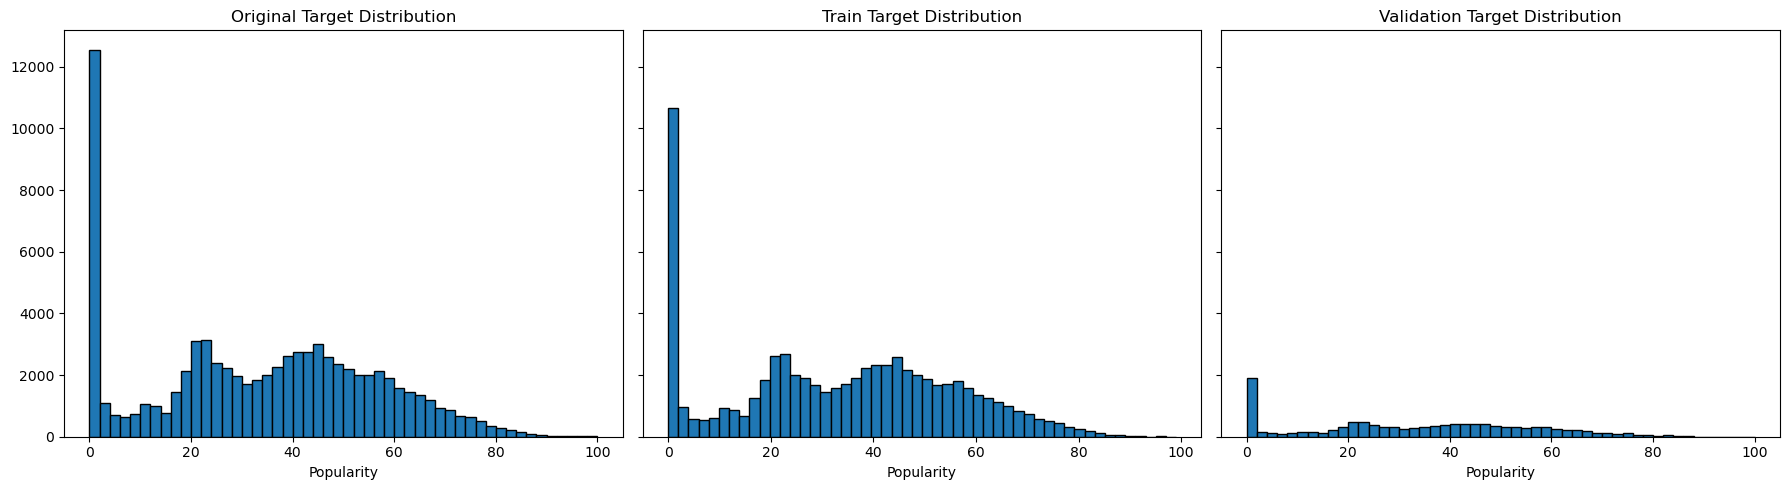

In [186]:
from sklearn.model_selection import train_test_split

# Split features and target
X = data.drop(columns='popularity')
y = data['popularity']

# Create bins for stratification (allow duplicate edges to be dropped)
y_bins = pd.qcut(y, q=10, labels=False, duplicates='drop')

# Stratified split using the bins
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.15, stratify=y_bins, random_state=42
)
X_test = dataTesting.copy()

# Plot histograms of target distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

axes[0].hist(y, bins=50, edgecolor='k')
axes[0].set_title('Original Target Distribution')
axes[0].set_xlabel('Popularity')

axes[1].hist(y_train, bins=50, edgecolor='k')
axes[1].set_title('Train Target Distribution')
axes[1].set_xlabel('Popularity')

axes[2].hist(y_valid, bins=50, edgecolor='k')
axes[2].set_title('Validation Target Distribution')
axes[2].set_xlabel('Popularity')

plt.tight_layout()
plt.show()

In [187]:
# Recreate sample weights (q=10 version)
from sklearn.utils.class_weight import compute_sample_weight

# Create bins for stratified splitting and weighting
y_bins = pd.qcut(y_train, q=10, duplicates='drop')

# Compute sample weights using balanced strategy
sample_weights = compute_sample_weight(class_weight='balanced', y=y_bins)

#### Add Semantic Understanding To Text variables

In [188]:
text_columns = X.select_dtypes(include=['object']).columns.tolist()
text_columns

['artists', 'album_name', 'track_genre']

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import TransformerMixin

class TfidfSVD(TransformerMixin):
    def __init__(self, column, n_components=50, max_features=5000):
        self.column = column
        self.n_components = n_components
        self.vectorizer = TfidfVectorizer(max_features=max_features)
        self.svd = TruncatedSVD(n_components=n_components, random_state=42)
    
    def fit(self, X, y=None):
        tfidf = self.vectorizer.fit_transform(X[self.column].astype(str))
        self.svd.fit(tfidf)
        return self
    
    def transform(self, X):
        tfidf = self.vectorizer.transform(X[self.column].astype(str))
        return self.svd.transform(tfidf)

	init:
	•	column: name of the text column this instance will handle
	•	TfidfVectorizer: converts raw text into a sparse matrix with TF-IDF weights
	•	max_features=5000: limits the number of words considered to the most frequent 5,000
	•	TruncatedSVD: reduces the TF-IDF output to n_components=50 dense dimensions

    fit:
	•	Fits the TF-IDF model on the specified column
	•	Then fits SVD on that output
	•	.astype(str) ensures everything is treated as text

	transform:
	•	Transforms the column into a dense SVD-reduced matrix
	•	This returns a matrix of shape (n_samples, n_components), e.g., (10000, 50)


In [190]:
# Create transformers
text_transformers = [TfidfSVD(col, n_components=50) for col in text_columns]

# Fit on training set
for tf in text_transformers:
    tf.fit(X_train)

# Transform sets
X_train_text = np.hstack([tf.transform(X_train) for tf in text_transformers])
X_valid_text = np.hstack([tf.transform(X_valid) for tf in text_transformers])
X_test_text = np.hstack([tf.transform(X_test) for tf in text_transformers])

In [191]:
# Select only numeric columns (exclude raw text)
X_train_num = X_train.drop(columns=text_columns)
X_valid_num = X_valid.drop(columns=text_columns)
X_test_num = X_test.drop(columns=text_columns)

# Matrices for base modeling
X_train_base = np.hstack([X_train_num.values, X_train_text])
X_valid_base = np.hstack([X_valid_num.values, X_valid_text])
X_test_base = np.hstack([X_test_num.values, X_test_text])

### 2. Calibración de Modelo [15 puntos]

#### Random Forest Base Model

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

rf_semantic = RandomForestRegressor(
    n_estimators=300,
    max_depth=25,
    min_samples_split=3,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)

#rf_semantic.fit(X_train_base, y_train, sample_weight=sample_weights)
rf_semantic.fit(X_train_base, y_train) # prueba sin weights
y_pred_rf_base = rf_semantic.predict(X_valid_base)
rmse_rf = root_mean_squared_error(y_valid, y_pred_rf_base)
print(f"Random Forest Base RMSE (semantic features): {rmse_rf:.4f}")

Random Forest Base RMSE (semantic features): 10.6140


##### Feature Importances

In [193]:
# numeric column names
num_feature_names = list(X_train.drop(columns=text_columns).columns)

# Generate semantic feature names
sem_feature_names = []
for col in text_columns:
    sem_feature_names += [f"{col}_svd_{i}" for i in range(50)]  #  50 components

# Combine all
all_feature_names = num_feature_names + sem_feature_names

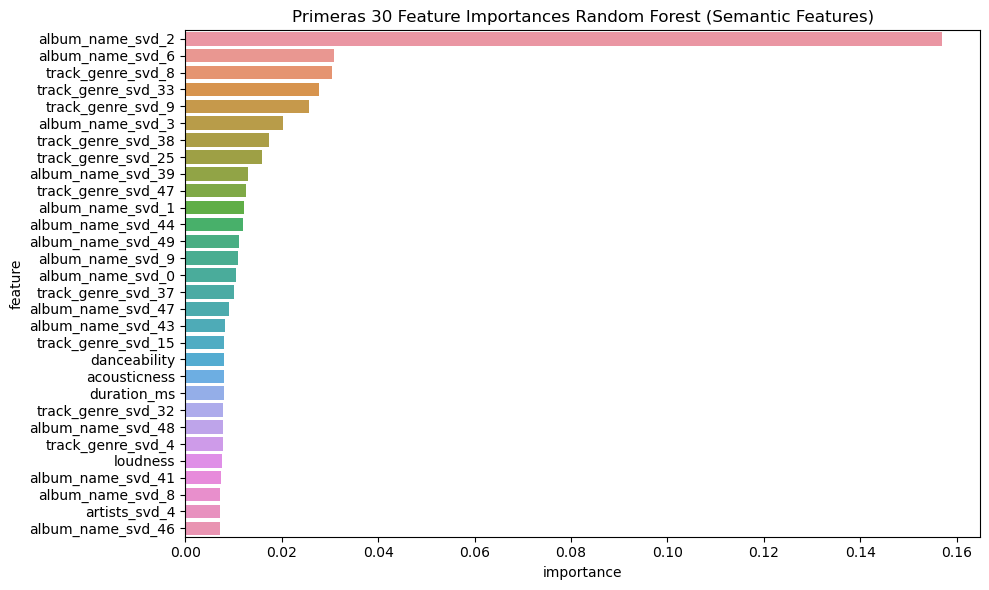

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get importances and match to feature names
rf_feat_imp = pd.DataFrame({
    "feature": all_feature_names,  
    "importance": rf_semantic.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot top N
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feat_imp.head(30), x="importance", y="feature")
plt.title("Primeras 30 Feature Importances Random Forest (Semantic Features)")
plt.tight_layout()
plt.show()

In [195]:
rf_feat_imp.head(50)

,feature,importance
64,album_name_svd_2,0.156983
68,album_name_svd_6,0.030743
120,track_genre_svd_8,0.030329
145,track_genre_svd_33,0.027734
121,track_genre_svd_9,0.025744
65,album_name_svd_3,0.020241
150,track_genre_svd_38,0.017377
137,track_genre_svd_25,0.015942
101,album_name_svd_39,0.012994
159,track_genre_svd_47,0.012607


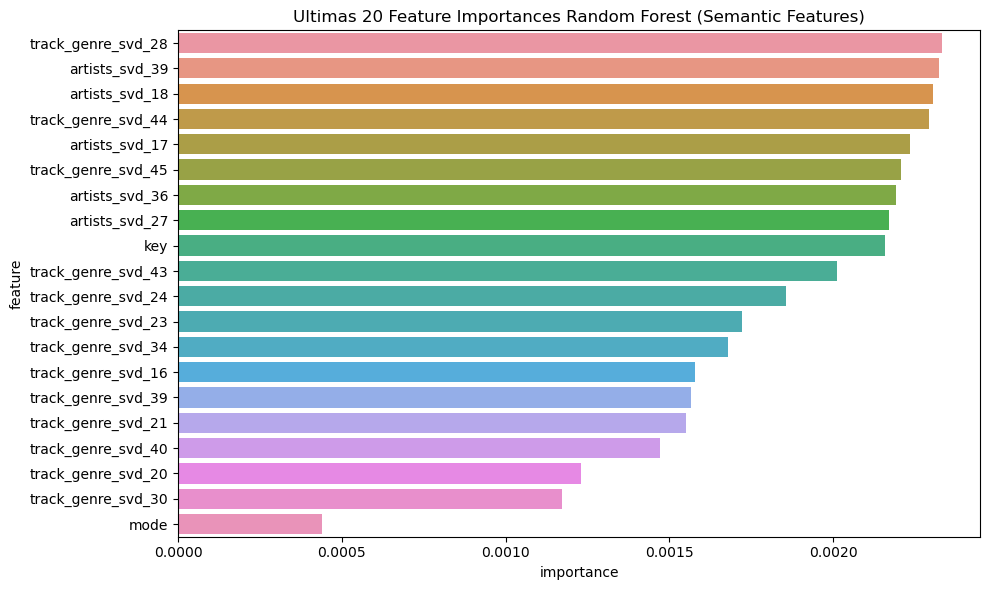

In [196]:
# Plot bottom
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feat_imp.tail(20), x="importance", y="feature")
plt.title("Ultimas 20 Feature Importances Random Forest (Semantic Features)")
plt.tight_layout()
plt.show()

In [197]:
rf_feat_imp.tail(50)

,feature,importance
45,artists_svd_33,0.002821
54,artists_svd_42,0.002784
23,artists_svd_11,0.002775
47,artists_svd_35,0.002753
19,artists_svd_7,0.002740
56,artists_svd_44,0.002725
18,artists_svd_6,0.002724
139,track_genre_svd_27,0.002718
115,track_genre_svd_3,0.002713
60,artists_svd_48,0.002713


##### XGBoost Base Model

In [198]:
import xgboost as xgb

# Initialize and train XGBoost
xgb_semantic = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.7,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)
# Train
#xgb_semantic.fit(X_train_base, y_train, sample_weight=sample_weights); # ; to prevent extra output and error to come out
xgb_semantic.fit(X_train_base, y_train); # prueba sin weights

In [199]:
# Predict 
from sklearn.metrics import root_mean_squared_error

# Predict on validation set
y_pred_xgb_sem = xgb_semantic.predict(X_valid_base)

# Evaluate using RMSE
rmse_semantic = root_mean_squared_error(y_valid, y_pred_xgb_sem)
print(f"Baseline RMSE with semantic features: {rmse_semantic:.4f}")

Baseline RMSE with semantic features: 9.6231


#### Feature Importances

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# importance scores
xgb_importances = xgb_semantic.feature_importances_

# Create dataframe
xgb_feat_imp = pd.DataFrame({
    "feature": all_feature_names,
    "importance": xgb_importances
}).sort_values(by="importance", ascending=False)


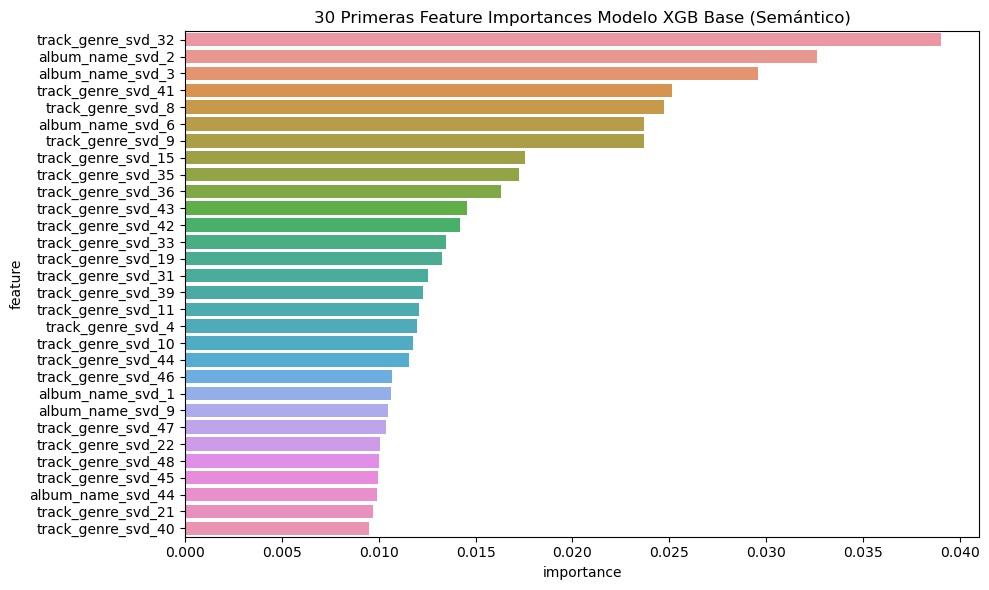

In [201]:
# Plot top 30
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_feat_imp.head(30), x="importance", y="feature")
plt.title("30 Primeras Feature Importances Modelo XGB Base (Semántico)")
plt.tight_layout()
plt.show()

In [202]:
xgb_feat_imp.head(50)

,feature,importance
144,track_genre_svd_32,0.039054
64,album_name_svd_2,0.032626
65,album_name_svd_3,0.029584
153,track_genre_svd_41,0.025128
120,track_genre_svd_8,0.024725
68,album_name_svd_6,0.023707
121,track_genre_svd_9,0.023691
127,track_genre_svd_15,0.017534
147,track_genre_svd_35,0.017246
148,track_genre_svd_36,0.016301


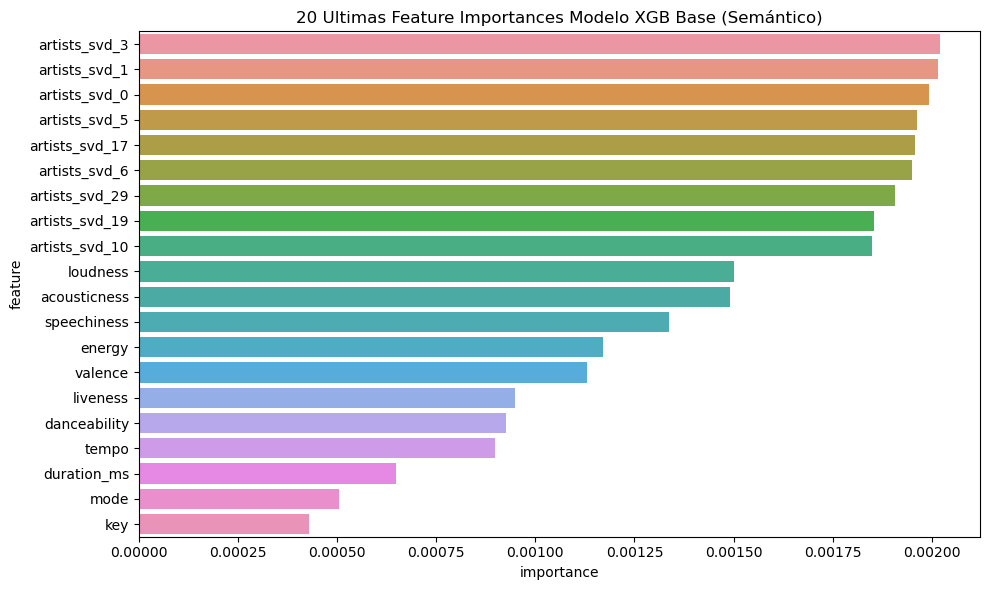

In [203]:
# Plot bottom 20
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_feat_imp.tail(20), x="importance", y="feature")
plt.title("20 Ultimas Feature Importances Modelo XGB Base (Semántico)")
plt.tight_layout()
plt.show()

In [204]:
xgb_feat_imp.shape

(162, 2)

In [205]:
xgb_feat_imp.tail(50)

,feature,importance
43,artists_svd_31,0.002648
44,artists_svd_32,0.002627
60,artists_svd_48,0.002600
56,artists_svd_44,0.002586
20,artists_svd_8,0.002582
54,artists_svd_42,0.002548
57,artists_svd_45,0.002489
40,artists_svd_28,0.002483
28,artists_svd_16,0.002464
37,artists_svd_25,0.002462


#### Light GBM Base

In [206]:
import lightgbm as lgb

lgb_semantic = lgb.LGBMRegressor(
    n_estimators=500,
    max_depth=12,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.9,
    colsample_bytree=0.7,
    reg_alpha=1.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

# se convierten a dfs para corregir warning 
X_train_base_df = pd.DataFrame(X_train_base, columns=all_feature_names)
X_valid_base_df = pd.DataFrame(X_valid_base, columns=all_feature_names)

#lgb_semantic.fit(X_train_base_df, y_train, sample_weight=sample_weights)
lgb_semantic.fit(X_train_base_df, y_train) # prueba sin weights
y_pred_lgb = lgb_semantic.predict(X_valid_base_df)

# Evaluate using RMSE
rmse_lgb = root_mean_squared_error(y_valid, y_pred_lgb)
print(f"LightGBM Base RMSE (semantic features): {rmse_lgb:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33563
[LightGBM] [Info] Number of data points in the train set: 67572, number of used features: 162
[LightGBM] [Info] Start training from score 33.354185
LightGBM Base RMSE (semantic features): 10.3437


#### Feature Importances

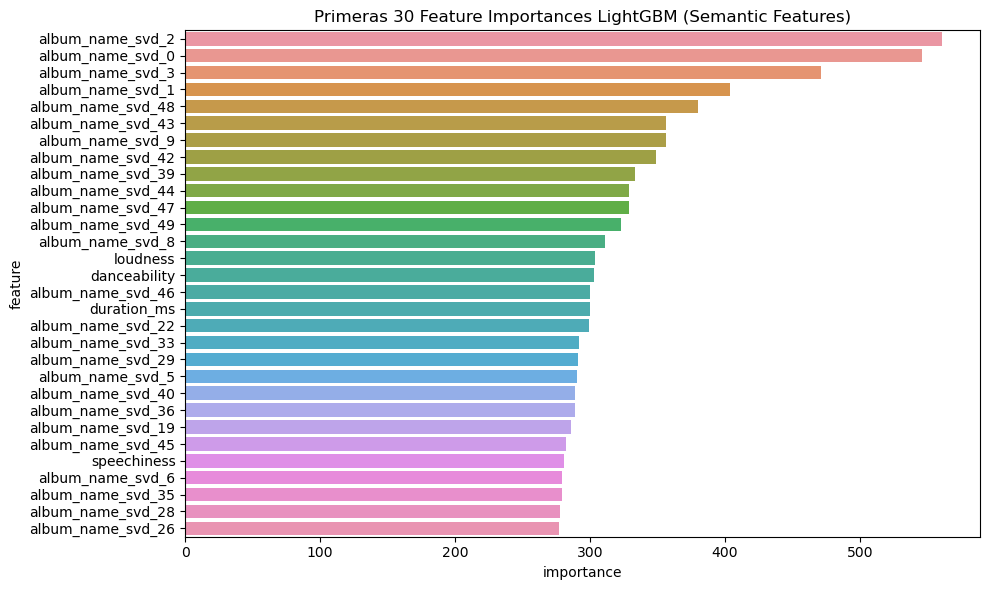

In [207]:
# Get importances from LGBM
lgb_feat_imp = pd.DataFrame({
    "feature": all_feature_names,
    "importance": lgb_semantic.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot top N
plt.figure(figsize=(10, 6))
sns.barplot(data=lgb_feat_imp.head(30), x="importance", y="feature")
plt.title("Primeras 30 Feature Importances LightGBM (Semantic Features)")
plt.tight_layout()
plt.show()

In [208]:
lgb_feat_imp.head(50)

,feature,importance
64,album_name_svd_2,561
62,album_name_svd_0,546
65,album_name_svd_3,471
63,album_name_svd_1,404
110,album_name_svd_48,380
105,album_name_svd_43,356
71,album_name_svd_9,356
104,album_name_svd_42,349
101,album_name_svd_39,333
106,album_name_svd_44,329


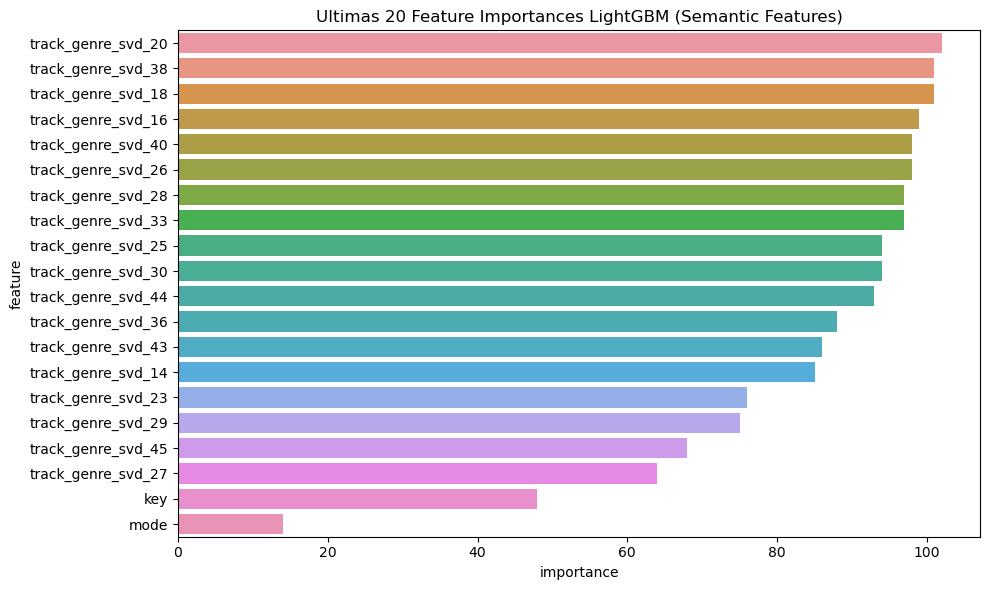

In [209]:
# Plot Bottom
plt.figure(figsize=(10, 6))
sns.barplot(data=lgb_feat_imp.tail(20), x="importance", y="feature")
plt.title("Ultimas 20 Feature Importances LightGBM (Semantic Features)")
plt.tight_layout()
plt.show()

In [210]:
lgb_feat_imp.tail(50)

,feature,importance
42,artists_svd_30,145
29,artists_svd_17,145
46,artists_svd_34,145
143,track_genre_svd_31,143
26,artists_svd_14,141
44,artists_svd_32,140
19,artists_svd_7,140
61,artists_svd_49,137
159,track_genre_svd_47,136
28,artists_svd_16,136


#### Modificando variables key y mode a ciclicas

In [211]:
def add_cyclical_features(df):
    df = df.copy()
    df['key_sin'] = np.sin(2 * np.pi * df['key'] / 12)
    df['key_cos'] = np.cos(2 * np.pi * df['key'] / 12)
    df['mode_sin'] = np.sin(2 * np.pi * df['mode'] / 2)
    df['mode_cos'] = np.cos(2 * np.pi * df['mode'] / 2)
    return df

In [ ]:
# Add cyclical features
X_train_cyc = add_cyclical_features(X_train_num)
X_valid_cyc = add_cyclical_features(X_valid_num)
X_test_cyc  = add_cyclical_features(X_test_num)

# Matrices for base+cyc modeling
X_train_base_cyc = np.hstack([X_train_cyc.values, X_train_text])
X_valid_base_cyc = np.hstack([X_valid_cyc.values, X_valid_text])
X_test_base_cyc = np.hstack([X_test_cyc.values, X_test_text])

#### Entrenar Dos Mejores Modelos Base con Variables ciclicas

In [216]:
xgb_cyc = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.7,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

xgb_cyc.fit(X_train_base_cyc, y_train)
y_pred_base_cyc = xgb_cyc.predict(X_valid_base_cyc)
rmse = root_mean_squared_error(y_valid, y_pred_base_cyc)
print(f"RMSE with cyclical + semantic features: {rmse:.4f}")

RMSE with cyclical + semantic features: 9.6880


#### Feature Importances

In [222]:
# 1. Get the base numeric columns (after dropping explicit, artist_count, etc.)
base_numeric_cols = X_train_num.columns.tolist()

# 2. Add cyclical feature names
cyclical_cols = ['key_sin', 'key_cos', 'mode_sin', 'mode_cos']

# 3. Generate semantic feature names (50 SVD per text col)
semantic_cols = []
for col in text_columns:
    semantic_cols += [f"{col}_svd_{i}" for i in range(50)]

# 4. Combine all into final feature name list
all_features_cyc = base_numeric_cols + cyclical_cols + semantic_cols

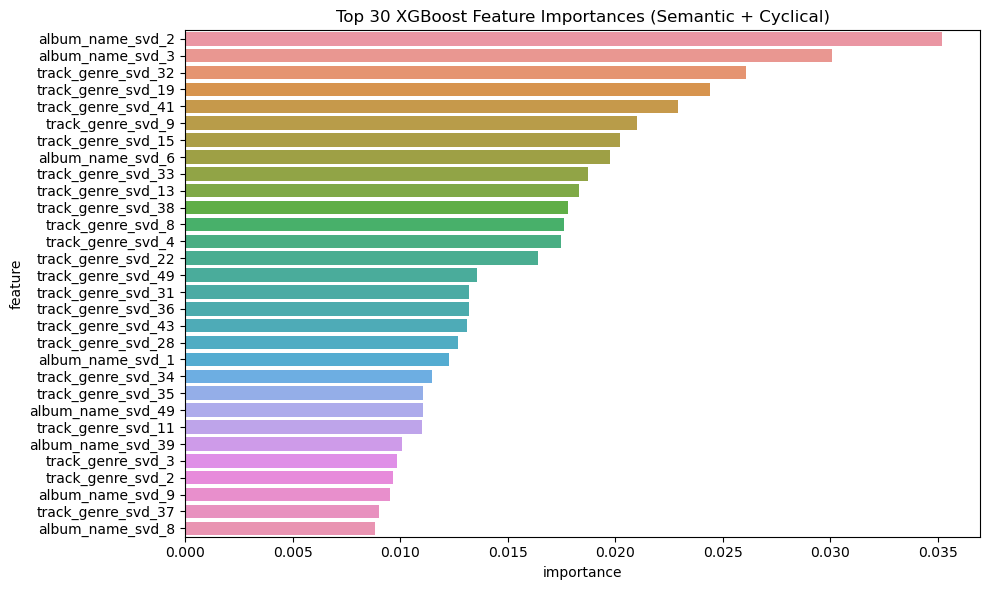

In [223]:
# importance scores
# Create importance DataFrame
xgb_feat_imp = pd.DataFrame({
    "feature": all_features_cyc,
    "importance": xgb_cyc.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot top 30
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_feat_imp.head(30), x="importance", y="feature")
plt.title("Top 30 XGBoost Feature Importances (Semantic + Cyclical)")
plt.tight_layout()
plt.show()

In [224]:
xgb_feat_imp.tail(30)

,feature,importance
16,artists_svd_0,0.002158
50,artists_svd_34,0.002144
26,artists_svd_10,0.002135
27,artists_svd_11,0.002128
39,artists_svd_23,0.002116
22,artists_svd_6,0.002099
56,artists_svd_40,0.002093
29,artists_svd_13,0.002083
53,artists_svd_37,0.002050
34,artists_svd_18,0.002037


#### Add Interactions

In [226]:
def add_interactions(df):
    df = df.copy()
    df['key_mode_energy'] = df['key_cos'] * df['mode_cos'] * df['energy']
    df['mode_valence'] = df['mode_cos'] * df['valence']
    df['key_loudness'] = df['key_cos'] * df['loudness']
    return df

In [227]:
X_train_int1 = add_interactions(X_train_cyc)
X_valid_int1 = add_interactions(X_valid_cyc)
X_test_int1  = add_interactions(X_test_cyc)

# Matrices for base+cyc+int1 modeling
X_train_base_cyc_int1 = np.hstack([X_train_int1.values, X_train_text])
X_valid_base_cyc_int1 = np.hstack([X_valid_int1.values, X_valid_text])
X_test_base_cyc_int1 = np.hstack([X_test_int1.values, X_test_text])

In [228]:
xgb_int1 = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.7,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

xgb_int1.fit(X_train_base_cyc_int1, y_train)
y_pred_base_int1 = xgb_int1.predict(X_valid_base_cyc_int1)
rmse_int1 = root_mean_squared_error(y_valid, y_pred_base_int1)
print(f"RMSE with cyclical + semantic features: {rmse_int1:.4f}")

RMSE with cyclical + semantic features: 9.7039


In [235]:
# 1. Base numeric columns (after drops)
base_numeric_cols = X_train_num.columns.tolist()

# 2. Cyclical feature names
cyclical_cols = ['key_sin', 'key_cos', 'mode_sin', 'mode_cos']

# 3. Interaction feature names (from your add_interactions function)
interaction_cols = ['key_mode_energy', 'mode_valence', 'key_loudness']

# 4. Semantic feature names
semantic_cols = []
for col in text_columns:
    semantic_cols += [f"{col}_svd_{i}" for i in range(50)]

# 5. Final list
all_features_cyc_int1 = base_numeric_cols + cyclical_cols + interaction_cols + semantic_cols

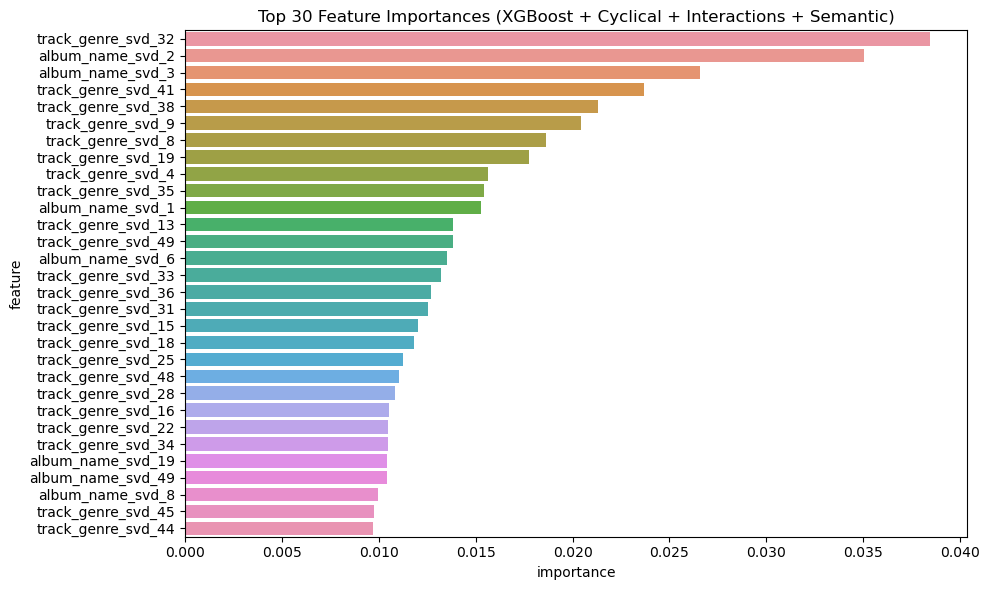

In [243]:
# Create importances DataFrame
xgb_feat_imp_int1 = pd.DataFrame({
    "feature": all_features_cyc_int1,
    "importance": xgb_int1.feature_importances_
}).sort_values(by="importance", ascending=False).reset_index(drop=True)

# Plot top 30
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_feat_imp_int1.head(30), x="importance", y="feature")
plt.title("Top 30 Feature Importances (XGBoost + Cyclical + Interactions + Semantic)")
plt.tight_layout()
plt.show()

In [233]:
xgb_feat_imp_int1.tail(30)

,feature,importance
42,artists_svd_23,0.002134
53,artists_svd_34,0.002129
19,artists_svd_0,0.002127
62,artists_svd_43,0.002112
22,artists_svd_3,0.002110
56,artists_svd_37,0.002101
59,artists_svd_40,0.002095
58,artists_svd_39,0.002086
20,artists_svd_1,0.002029
37,artists_svd_18,0.001954


In [237]:
### Just in case let's try Light GBM

lgb_cyc_int1 = lgb.LGBMRegressor(
    n_estimators=500,
    max_depth=12,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.9,
    colsample_bytree=0.7,
    reg_alpha=1.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

# se convierten a dfs para corregir warning 
X_train_base_cyc_int1_df = pd.DataFrame(X_train_base_cyc_int1, columns=all_features_cyc_int1)
X_valid_base_cyc_int1_df = pd.DataFrame(X_valid_base_cyc_int1, columns=all_features_cyc_int1)

#lgb_semantic.fit(X_train_base_df, y_train, sample_weight=sample_weights)
lgb_cyc_int1.fit(X_train_base_cyc_int1_df, y_train) # prueba sin weights
y_pred_lgb_cyc_int1 = lgb_cyc_int1.predict(X_valid_base_cyc_int1_df)

# Evaluate using RMSE
rmse_lgb_cyc_int1 = root_mean_squared_error(y_valid, y_pred_lgb_cyc_int1)
print(f"LightGBM Base RMSE (semantic features): {rmse_lgb_cyc_int1:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34354
[LightGBM] [Info] Number of data points in the train set: 67572, number of used features: 169
[LightGBM] [Info] Start training from score 33.354185
LightGBM Base RMSE (semantic features): 10.4552


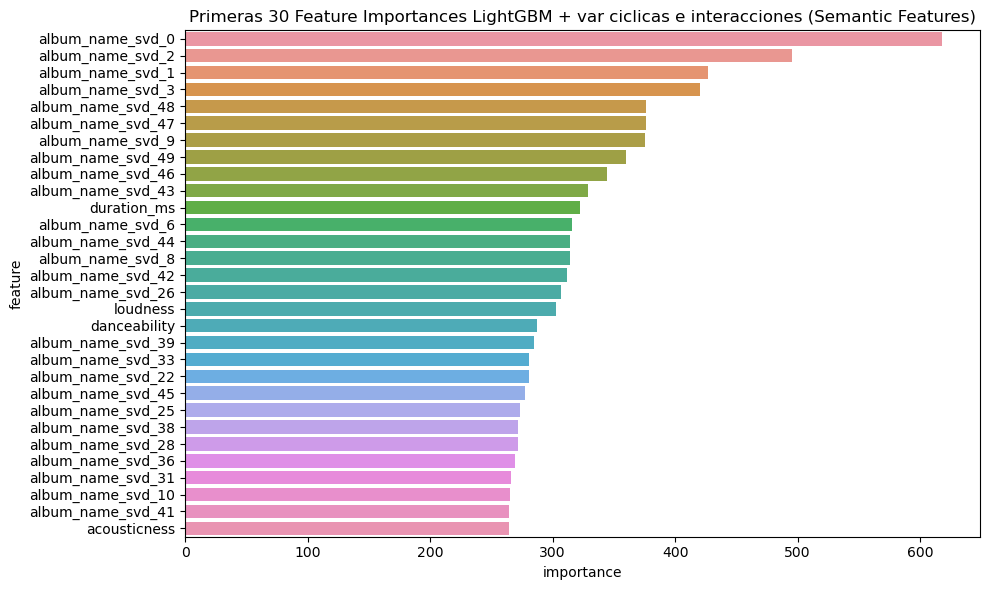

In [252]:
# Get importances from LGBM
lgb_feat_imp_cyc_int1 = pd.DataFrame({
    "feature": all_features_cyc_int1,
    "importance": lgb_cyc_int1.feature_importances_
}).sort_values(by="importance", ascending=False).reset_index(drop=True)

# Plot top N
plt.figure(figsize=(10, 6))
sns.barplot(data=lgb_feat_imp_cyc_int1.head(30), x="importance", y="feature")
plt.title("Primeras 30 Feature Importances LightGBM + var ciclicas e interacciones (Semantic Features)")
plt.tight_layout()
plt.show()

In [239]:
lgb_feat_imp_cyc_int1.tail(30)

,feature,importance
143,track_genre_svd_24,108
147,track_genre_svd_28,107
166,track_genre_svd_47,106
18,key_loudness,104
133,track_genre_svd_14,101
130,track_genre_svd_11,99
162,track_genre_svd_43,98
142,track_genre_svd_23,98
137,track_genre_svd_18,94
163,track_genre_svd_44,93


#### Checking status of newly created variables

In [248]:
to_check = ['key_sin', 'key_cos', 'mode_sin', 'mode_cos',
            'key_mode_energy', 'mode_valence', 'key_loudness',
            'key', 'mode']

In [249]:
xgb_feat_imp_int1['rank'] = xgb_feat_imp_int1.index + 1
xgb_feat_imp_int1[xgb_feat_imp_int1['feature'].isin(to_check)]


,feature,importance,rank
155,mode_valence,0.001096,156
160,key_mode_energy,0.000890,161
161,key_loudness,0.000799,162
162,key_sin,0.000752,163
164,key_cos,0.000519,165
165,mode_sin,0.000468,166
166,key,0.000380,167
167,mode,0.000337,168
168,mode_cos,0.000202,169


In [251]:
lgb_feat_imp_cyc_int1['rank'] = lgb_feat_imp_cyc_int1.index + 1
lgb_feat_imp_cyc_int1[lgb_feat_imp_cyc_int1['feature'].isin(to_check)]

,feature,importance,rank
112,mode_valence,146,113
117,key_mode_energy,139,118
142,key_loudness,104,143
163,key_sin,48,164
164,key,29,165
165,key_cos,20,166
166,mode,7,167
167,mode_sin,1,168
168,mode_cos,0,169


In [254]:
lgb_feat_imp_cyc_int1.shape

(169, 2)

##### Estas caracteristicas nuevas no añaden valor, entonces se retiran incluyendo 'key' y 'mode'

In [255]:
drop_features = [
    'key', 'mode',
    'key_sin', 'key_cos', 'mode_sin', 'mode_cos',
    'key_mode_energy', 'mode_valence', 'key_loudness'
]

In [256]:
X_train_wo_cyc_int1 = X_train_int1.drop(columns=drop_features)
X_valid_wo_cyc_int1 = X_valid_int1.drop(columns=drop_features)
X_test_wo_cyc_int1  = X_test_int1.drop(columns=drop_features)

# Matrices clean for  modeling
X_train_clean = np.hstack([X_train_wo_cyc_int1.values, X_train_text])
X_valid_clean = np.hstack([X_valid_wo_cyc_int1.values, X_valid_text])
X_test_clean  = np.hstack([X_test_wo_cyc_int1.values, X_test_text])

#### Reentreando Modelos Limpios

In [ ]:
xgb_clean = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.7,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

xgb_clean.fit(X_train_clean, y_train)


RMSE with cyclical + semantic features: 9.6311


In [258]:
y_pred_clean = xgb_clean.predict(X_valid_clean)
rmse_clean = root_mean_squared_error(y_valid, y_pred_clean)
print(f"RMSE sin caracteristicas no importantes  semantic features: {rmse_clean:.4f}")

RMSE sin caracteristicas no importantes  semantic features: 9.6311
